In [570]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from Autoencoder_encapsulate import AE
from helper import set_seed, read_csv, dic_read, factor_hf_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
from keras.models import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [571]:
set_seed()

# Train on real data, test on real data

In [572]:
hfd = read_csv('./cleaned_data/hfd.csv')
factor_etf_data = read_csv('./cleaned_data/factor_etf_data.csv')
hfd_fullname = dic_read('./cleaned_data/hfd_fullname.pkl')
factor_etf_name = dic_read('./cleaned_data/factor_etf_name.pkl')
rf = read_csv('./cleaned_data/rf.csv')
all_data_name = {**factor_etf_name, **hfd_fullname}

In [573]:
factor_etf_data

,LUMSTRUU,LT09STAT,WGBI,EMUSTRUU,TWEXB,SPGSCI_PM,SPGSCI_Gra,SPGSCI_O,LCB1TRUU,MSCI_EXUS,...,R200,FTSE_REIT,VIX,PUT,PUTY,CLL,BFLY,BXM,BXY,CLLZ
Date,,,,,,,,,,,,,,,,,,,,,
1994-04-30,-0.010050,-0.010510,-0.001512,-0.007504,-0.002028,-0.050972,-0.006193,0.134336,-0.014057,0.035814,...,0.002524,0.007464,0.502668,-0.045572,-0.033339,-0.043491,-0.035201,-0.044685,-0.054253,-0.035898
1994-05-31,0.000804,-0.004358,-0.011952,0.050673,0.008052,0.025158,0.007595,0.102099,-0.007996,-0.009618,...,-0.015825,0.011952,-0.537130,0.040066,0.030547,0.013777,0.030887,0.038541,0.047693,0.034231
1994-06-30,-0.005243,-0.005325,0.011250,-0.058193,-0.016221,-0.009874,-0.076151,0.083667,-0.004310,0.007144,...,-0.038940,-0.026822,0.278415,-0.029266,-0.014017,-0.036533,-0.031696,-0.040052,-0.044236,-0.031287
1994-07-31,0.017027,0.015266,0.005134,0.021182,0.002460,0.004584,-0.045010,0.075930,0.025376,0.006914,...,0.012479,-0.014797,-0.513626,0.041184,0.033299,0.029988,0.031512,0.046321,0.048874,0.030854
1994-08-31,-0.000521,-0.003437,-0.007141,0.064213,-0.008259,-0.000169,0.077167,-0.137723,-0.001354,0.019771,...,0.049054,-0.006915,0.197320,-0.008357,-0.008838,0.016525,-0.036890,-0.008449,0.008494,0.007702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,-0.000900,-0.005147,-0.006239,0.009706,-0.007787,0.028348,0.033358,0.130585,0.000292,0.048731,...,0.020884,0.086941,-0.104771,-0.002753,0.008348,-0.004716,-0.043081,-0.005233,-0.005967,-0.002532
2022-01-31,-0.014942,-0.019126,-0.021297,-0.026688,0.002552,-0.020116,0.044658,0.165370,-0.035137,-0.045609,...,-0.101571,-0.083452,0.273872,-0.028247,-0.010455,-0.034947,-0.025695,-0.028748,-0.040795,-0.033074
2022-02-28,-0.009715,-0.006611,-0.010666,-0.046475,-0.002581,0.059203,0.131384,0.098248,-0.021220,-0.017462,...,0.009634,-0.040701,-0.009839,0.028121,0.035467,0.001637,0.004160,0.019713,0.019297,0.013304


In [574]:
X_train, X_test, Y_train, Y_test = train_test_split(factor_etf_data, hfd, shuffle=False, test_size=.5)

In [575]:
real_obj=[]
IS=[]
OOS=[]
OOS_RMSE=[]
IS_RMSE=[]
for i in range(1,22):
    autoencoder_real = AE(X_train,Y_train,X_test,Y_test,i)
    autoencoder_real.train(verbose=0,plot=False)
    real_obj.append(autoencoder_real)
    IS.append(autoencoder_real.model_IS_r2())
    IS_RMSE.append(autoencoder_real.model_IS_RMSE())
    OOS.append(autoencoder_real.model_OOS_r2())
    OOS_RMSE.append(autoencoder_real.model_OOS_RMSE())

    print(f"{i}/21")


1/21
2/21
3/21
4/21
5/21
6/21
7/21
8/21
9/21
10/21
11/21
12/21
13/21
14/21
15/21
16/21
17/21
18/21
19/21
20/21
21/21


# Autoencoder quality evaluation

In [576]:
np.round(IS,3).T

array([0.138, 0.213, 0.197, 0.479, 0.382, 0.506, 0.505, 0.544, 0.554,
       0.481, 0.731, 0.849, 0.659, 0.846, 0.821, 0.855, 0.627, 0.817,
       0.688, 0.785, 0.889])

In [577]:
np.round(IS_RMSE,3)

array([0.15 , 0.142, 0.145, 0.113, 0.124, 0.109, 0.11 , 0.103, 0.106,
       0.114, 0.081, 0.058, 0.091, 0.059, 0.064, 0.057, 0.094, 0.064,
       0.086, 0.07 , 0.05 ])

Text(0.5, 1.0, 'R2 OOS for Different Latent Dimensions')

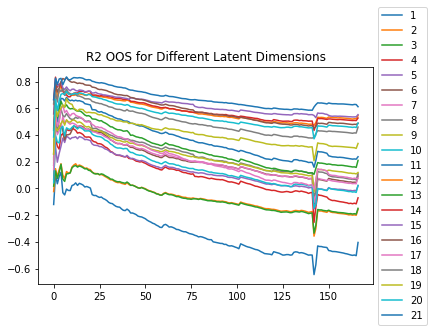

In [578]:
plt.plot(pd.DataFrame(OOS).T)
plt.legend(range(1,22),bbox_to_anchor=(1, 1.3))
plt.title('R2 OOS for Different Latent Dimensions')

Text(0.5, 1.0, 'RMSE OOS for Different Latent Dimensions')

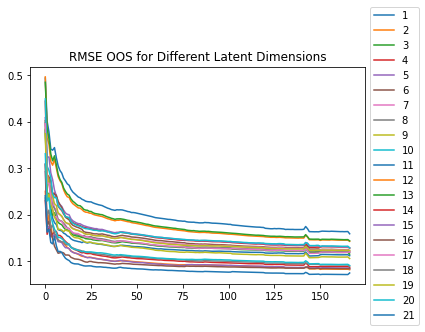

In [579]:
plt.plot(pd.DataFrame(OOS_RMSE).T)
plt.legend(range(1,22),bbox_to_anchor=(1, 1.3))
plt.title('RMSE OOS for Different Latent Dimensions')

In [580]:
OOS_acc = pd.DataFrame(OOS).T
OOS_RMSE = pd.DataFrame(OOS_RMSE).T

In [581]:
np.round(OOS_acc.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
0,167.0,-0.314,0.181,-0.645,-0.474,-0.374,-0.175,0.121
1,167.0,-0.060,0.115,-0.358,-0.165,-0.084,0.024,0.185
2,167.0,-0.063,0.113,-0.335,-0.165,-0.088,0.024,0.181
3,167.0,0.112,0.160,-0.254,-0.021,0.076,0.222,0.454
4,167.0,0.134,0.126,-0.154,0.021,0.109,0.223,0.391
5,167.0,0.212,0.134,-0.118,0.092,0.186,0.308,0.482
6,167.0,0.216,0.140,-0.106,0.094,0.192,0.318,0.539
7,167.0,0.256,0.144,-0.057,0.130,0.225,0.360,0.596
8,167.0,0.248,0.128,-0.025,0.133,0.218,0.339,0.515
9,167.0,0.161,0.152,-0.148,0.030,0.126,0.269,0.470


In [582]:
np.round(OOS_RMSE.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
0,167.0,0.199,0.048,0.159,0.170,0.183,0.210,0.494
1,167.0,0.178,0.047,0.143,0.152,0.162,0.187,0.497
2,167.0,0.181,0.048,0.144,0.154,0.165,0.190,0.485
3,167.0,0.154,0.036,0.128,0.135,0.143,0.161,0.444
4,167.0,0.157,0.038,0.128,0.136,0.144,0.162,0.409
5,167.0,0.149,0.034,0.122,0.130,0.137,0.154,0.403
6,167.0,0.145,0.031,0.120,0.129,0.135,0.150,0.377
7,167.0,0.140,0.032,0.119,0.124,0.130,0.143,0.398
8,167.0,0.144,0.032,0.123,0.127,0.133,0.149,0.384
9,167.0,0.156,0.036,0.129,0.138,0.145,0.161,0.449


# Autoencoder ex-ante, ex-post

In [192]:
import anndata2ri

anndata2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [193]:
%%R
# R code from Michael Ashby
library(pracma)
library(corpcor)
hktest <- function(rt, rb) {
  K = ncol(as.matrix(rb))
  N = ncol(as.matrix(rt))
  Tn = nrow(as.matrix(rt))

  A <- rbind(cbind(1, matrix(0, 1, K)), cbind(0, -matrix(1, 1, K)))
  C <- rbind(matrix(0, 1, N), -matrix(1, 1, N))
  X <- cbind(matrix(1, Tn, 1), rb)
  B <- mldivide(X, rt)
  Theta <- A %*% B - C
  e <- as.matrix(rt) - X %*% B
  Sigma <- cov(e)
  H <- Theta %*% inv(Sigma) %*% t(Theta)

  mu1 <- t(colMeans(rb))
  #V11i <- inv(cov(rb))#this doesnt work for singular matrix
  V11i <- pseudoinverse(cov(rb))
  a1 <- mu1 %*% V11i %*% t(mu1)
  b1 <- colSums(V11i %*% t(mu1))
  c1 <- sum(V11i)
  d1 <- a1 * c1 - b1^2
  G <- rbind(cbind(1 + a1, b1), cbind(b1, c1))

  lam <- eig(H %*% inv(G))

  Ui <- prod(1 + lam)
  if (N == 1)
  { Ftest <- (Tn - K - 1) * (Ui - 1) / 2 } else
  { Ftest <- (Tn - K - N) * (sqrt(Ui) - 1) / N }

  p = ifelse(N > 1,
             pf(Ftest, df1 = 2 * N, df2 = 2 * (Tn - N - K), lower.tail = FALSE),
             pf(Ftest, df1 = 2, df2 = (Tn - K - 1), lower.tail = FALSE))

  HK = rbind(Ftest, p)
  rownames(HK) = c('F-stat', 'p-value')
  return(HK) }

In [194]:
%%R -o hktest
hktest

function (rt, rb) 
{
    K = ncol(as.matrix(rb))
    N = ncol(as.matrix(rt))
    Tn = nrow(as.matrix(rt))
    A <- rbind(cbind(1, matrix(0, 1, K)), cbind(0, -matrix(1, 
        1, K)))
    C <- rbind(matrix(0, 1, N), -matrix(1, 1, N))
    X <- cbind(matrix(1, Tn, 1), rb)
    B <- mldivide(X, rt)
    Theta <- A %*% B - C
    e <- as.matrix(rt) - X %*% B
    Sigma <- cov(e)
    H <- Theta %*% inv(Sigma) %*% t(Theta)
    mu1 <- t(colMeans(rb))
    V11i <- pseudoinverse(cov(rb))
    a1 <- mu1 %*% V11i %*% t(mu1)
    b1 <- colSums(V11i %*% t(mu1))
    c1 <- sum(V11i)
    d1 <- a1 * c1 - b1^2
    G <- rbind(cbind(1 + a1, b1), cbind(b1, c1))
    lam <- eig(H %*% inv(G))
    Ui <- prod(1 + lam)
    if (N == 1) {
        Ftest <- (Tn - K - 1) * (Ui - 1)/2
    }
    else {
        Ftest <- (Tn - K - N) * (sqrt(Ui) - 1)/N
    }
    p = ifelse(N > 1, pf(Ftest, df1 = 2 * N, df2 = 2 * (Tn - 
        N - K), lower.tail = FALSE), pf(Ftest, df1 = 2, df2 = (Tn - 
        K - 1), lower.tail = FALSE))
   

In [195]:
%%R
grstest<-function (ret.mat, factor.mat)
{
  ret.mat = as.matrix(ret.mat)
  factor.mat = as.matrix(factor.mat)
  N = ncol(ret.mat)
  T = nrow(ret.mat)
  K = ncol(factor.mat)
  e.mat = matrix(NA, ncol = N, nrow = T)
  b.mat = matrix(NA, ncol = K + 1, nrow = N)
  se.mat = matrix(NA, ncol = K + 1, nrow = N)
  R2.mat = matrix(NA, ncol = 1, nrow = N)
  t.mat = matrix(NA, ncol = K + 1, nrow = N)
  p.mat = matrix(NA, ncol = K + 1, nrow = N)
  one = matrix(1, nrow = T, ncol = 1)
  dat = as.matrix(cbind(one, factor.mat))
  for (i in 1:N) {
    ri = as.matrix(ret.mat[, i, drop = F])
    b = solve(t(dat) %*% dat) %*% t(dat) %*% ri
    e = ri - dat %*% b
    b.mat[i, ] = b
    e.mat[, i] = e
    R2.mat[i, ] = 1 - sum(e^2)/sum((ri - mean(ri))^2)
    s2 = sum(e^2)/(T - K - 1)
    covmat = s2 * solve(t(dat) %*% dat)
    se.mat[i, ] = sqrt(diag(covmat))
    t.mat[i, ] = b/sqrt(diag(covmat))
    p.mat[i, ] = 2 * pt(abs(b/sqrt(diag(covmat))), df = T -
      K - 1, lower.tail = FALSE)
  }
  sigma = crossprod(e.mat)/(T - K - 1)
  alpha = matrix(b.mat[, 1], nrow = N)
  factor.mean = t(matrix(colMeans(factor.mat), nrow = K, ncol = T))
  omega = crossprod(factor.mat - factor.mean)/(T - 1)
  tem1 = t(alpha) %*% solve(sigma) %*% alpha
  tem2 = 1 + factor.mean[1, , drop = FALSE] %*% solve(omega) %*%
    t(factor.mean[1, , drop = FALSE])
  tem3 = T/N
  tem4 = (T - N - K)/(T - K - 1)
  F = tem3 * tem4 * (tem1/tem2)
  p.F = pf(F, df1 = N, df2 = T - N - K, lower.tail = FALSE)
  res = rbind(F,p.F)
  return(res)
}

# return(list(GRS.stat = F, GRS.pval = p.F, coef = b.mat,
#     resid = e.mat, tstat = t.mat, pval = p.mat, se = se.mat,
#     R2 = R2.mat))

In [196]:
%%R -o grstest
grstest

function (ret.mat, factor.mat) 
{
    ret.mat = as.matrix(ret.mat)
    factor.mat = as.matrix(factor.mat)
    N = ncol(ret.mat)
    T = nrow(ret.mat)
    K = ncol(factor.mat)
    e.mat = matrix(NA, ncol = N, nrow = T)
    b.mat = matrix(NA, ncol = K + 1, nrow = N)
    se.mat = matrix(NA, ncol = K + 1, nrow = N)
    R2.mat = matrix(NA, ncol = 1, nrow = N)
    t.mat = matrix(NA, ncol = K + 1, nrow = N)
    p.mat = matrix(NA, ncol = K + 1, nrow = N)
    one = matrix(1, nrow = T, ncol = 1)
    dat = as.matrix(cbind(one, factor.mat))
    for (i in 1:N) {
        ri = as.matrix(ret.mat[, i, drop = F])
        b = solve(t(dat) %*% dat) %*% t(dat) %*% ri
        e = ri - dat %*% b
        b.mat[i, ] = b
        e.mat[, i] = e
        R2.mat[i, ] = 1 - sum(e^2)/sum((ri - mean(ri))^2)
        s2 = sum(e^2)/(T - K - 1)
        covmat = s2 * solve(t(dat) %*% dat)
        se.mat[i, ] = sqrt(diag(covmat))
        t.mat[i, ] = b/sqrt(diag(covmat))
        p.mat[i, ] = 2 * pt(abs(b/sqrt(diag(covmat)))

In [197]:
three_factor = pd.read_csv('data/F-F_Research_Data_Factors_daily.CSV', usecols=['Date', 'Mkt-RF', 'SMB', 'HML'])
three_factor['Date'] = pd.to_datetime(three_factor['Date'], format='%Y%m%d')
three_factor.set_index('Date', inplace=True)
three_factor = three_factor.resample('M').sum()
three_factor = np.log(three_factor / 100 + 1)  #log return
three_factor = three_factor.loc['1994-04-30':'2022-04-30', :]
three_factor

,Mkt-RF,SMB,HML
Date,,,
1994-04-30,0.007472,-0.008940,0.015873
1994-05-31,0.006876,-0.021019,0.006181
1994-06-30,-0.030872,-0.004611,0.017152
1994-07-31,0.027323,-0.017553,0.005982
1994-08-31,0.038547,0.013508,-0.024395
...,...,...,...
2021-12-31,0.031402,-0.014200,0.029365
2022-01-31,-0.064752,-0.062620,0.123014
2022-02-28,-0.021224,0.022251,0.028296


In [198]:
five_factor = pd.read_csv('data/F-F_Research_Data_5_Factors_2x3_daily.CSV', usecols=['Date', 'Mkt-RF', 'SMB', 'HML'])
five_factor['Date'] = pd.to_datetime(five_factor['Date'], format='%Y%m%d')
five_factor.set_index('Date', inplace=True)
five_factor = five_factor.resample('M').sum()
five_factor = np.log(five_factor / 100 + 1)  #log return
five_factor = five_factor.loc['1994-04-30':'2022-04-30', :]
five_factor

,Mkt-RF,SMB,HML
Date,,,
1994-04-30,0.007472,-0.009848,0.015873
1994-05-31,0.006876,-0.025215,0.006181
1994-06-30,-0.030872,-0.005515,0.017152
1994-07-31,0.027323,-0.017757,0.005982
1994-08-31,0.038547,0.013212,-0.024395
...,...,...,...
2021-12-31,0.031402,-0.005616,0.029365
2022-01-31,-0.064752,-0.041343,0.123014
2022-02-28,-0.021224,0.028685,0.028296


In [199]:
def Omega_ratio(df, threashold=0):
    '''

    :param df:one dimensional array
    :param threashold:
    :return:
    '''
    daily_threashold = (threashold + 1) ** np.sqrt(1 / 252) - 1
    r = np.array(df)
    excess = r - daily_threashold
    return np.sum(excess[excess > 0]) / (-np.sum(excess[excess < 0]))


def Omega_Curve(df, thresholds=np.linspace(0, 0.2, 50)):
    omega_value = []
    for i in thresholds:
        omega_value.append(Omega_ratio(df, i))
    return omega_value


def annualized_sharpe_ratio(ret,rf=0):
    #only for excess return (rf already deducted)
    ret = np.array(ret)
    # if rf !=0:
    rf=np.array(rf)
    # print((np.mean(ret)-np.mean(rf)))
    return (np.mean(ret)-np.mean(rf))/ np.std(ret) * np.sqrt(12)


def OLS_alpha(ret, X):
    res = sm.OLS(ret, sm.add_constant(X)).fit()
    return res.params[0]


def historicalVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the percentile of the distribution at the given alpha confidence level
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")


def historicalCVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the CVaR for dataframe / series
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= historicalVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalCVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

def ceq(ret,rf,gamma=2):
    assert gamma != 1
    # assert isinstance(ret,pd.Series) and isinstance(rf,pd.Series)
    assert len(ret) == len(rf)
    df=pd.DataFrame(rf).join(ret)
    df['mid']=np.power((1+df.iloc[:,1])/(1+df.iloc[:,0]),(1-gamma))
    average=np.mean(df['mid'])
    # return df
    # print(average)
    numerator=np.log(average)
    denominator=((1-gamma)/12)
    return numerator/denominator

def data_analysis(df, name, rf=None,start=None, end=None, span=None, real_data=True):
    '''

    :param df:
    :param name:
    :param start: optional. if no input, we take the whole df as start and end
    :param end: optional. same as above
    :param span: optional. if span is None: we take the span as df exclude current column
    :return:
    '''
    if rf is None:
        rf=pd.DataFrame(np.zeros(len(df.iloc[:,0])),index=df.index)

    omega0 = []
    omega10 = []
    omega_curve = []
    sharpe = []
    FF3F_alpha = []
    FF5F_alpha = []
    HKF = []
    HKP = []
    GRSF = []
    GRSP = []
    ES = []
    CEQ2=[]
    CEQ5=[]
    CEQ10=[]
    for strat in df.columns:
        omega0.append(Omega_ratio(df[strat], 0))
        omega10.append(Omega_ratio(df[strat], 0.1))
        sharpe.append(annualized_sharpe_ratio(df[strat],rf))
        omega_curve.append(Omega_Curve(df[strat]))
        ES.append(historicalCVaR(df[strat]))
        CEQ2.append(ceq(df[strat],rf,gamma=2))
        CEQ5.append(ceq(df[strat],rf,gamma=5))
        CEQ10.append(ceq(df[strat],rf,gamma=10))

        if real_data:
            if start and end:
                FF3F_alpha.append(OLS_alpha(df[strat], three_factor.loc[start: end, ]))
                FF5F_alpha.append(OLS_alpha(df[strat], five_factor.loc[start: end, ]))
            else:
                FF3F_alpha.append(OLS_alpha(df[strat], three_factor))
                FF5F_alpha.append(OLS_alpha(df[strat], five_factor))
            if span is not None:
                if start and end:
                    hk = hktest(np.array(df[strat]), np.array(span.loc[start:end, ]))
                    grs = grstest(np.array(df[strat]), np.array(span.loc[start:end, ]))
                else:
                    hk = hktest(np.array(df[strat]), np.array(span))
                    grs = grstest(np.array(df[strat]), np.array(span))
            else:
                hk = hktest(np.array(df[strat]), np.array(df.loc[:, df.columns != strat]))
                grs = grstest(np.array(df[strat]), np.array(df.loc[:, df.columns != strat]))

            HKF.append(hk[0][0])
            HKP.append(round(hk[1][0], 6))
            GRSF.append(grs[0][0])
            GRSP.append(round(grs[1][0], 6))

    if real_data:
        stats = pd.DataFrame(
            [df.skew().values, df.kurt().values, omega0, omega10, ES,CEQ2, CEQ5, CEQ10, sharpe, FF3F_alpha, FF5F_alpha, GRSF, HKF, GRSP,
             HKP]).T
        stats.columns = ['Skewness', 'Kurtosis', 'Omega_ratio(0%)', 'Omega_ratio(10%)', 'cVaR(95%)', 'CEQ Gamma=2','CEQ Gamma=5','CEQ Gamma=10',
                         'Annualized_Sharpe', 'FF3F_alpha', 'FF5F_alpha', 'GRS_testF', 'HK_testF', 'GRS_test_pval',
                         'HK_test_pval']
        stats.index = name
        return stats
    else:
        stats = pd.DataFrame(
            [df.skew().values, df.kurt().values, omega0, omega10, ES, sharpe, CEQ2, CEQ5, CEQ10,]).T
        stats.columns = ['Skewness', 'Kurtosis', 'Omega_ratio(0%)', 'Omega_ratio(10%)', 'cVaR(95%)','CEQ Gamma=2','CEQ Gamma=5','CEQ Gamma=10',
                         'Annualized_Sharpe', ]
        stats.index = name
        return stats

In [583]:
# obj=[]
ante = []
post=[]
plot=[]
turnover = []
for i,ae_obj in enumerate(real_obj):
    # autoencoder_real = AE(X_train, Y_train, X_test, Y_test, i)
    # autoencoder_real.train(verbose=0, plot=False)
    ante.append(ae_obj.ante(rf, hfd))
    turnover.append(ae_obj.turnover(hfd_fullname))
    post.append(ae_obj.post(factor_etf_data))
    # obj.append(autoencoder_real)
    print(f'{i+1}/21')


1/21
2/21
3/21
4/21
5/21
6/21
7/21
8/21
9/21
10/21
11/21
12/21
13/21
14/21
15/21
16/21
17/21
18/21
19/21
20/21
21/21


In [584]:
ante_res=[]
post_res=[]
for ex_ante in ante:
    ante_res.append(data_analysis(ex_ante,hfd_fullname.values(),rf=rf[-144:],span=factor_etf_data,real_data=True,start='2010-05-31',end='2022-04-30'))
for ex_post in post:
    post_res.append(data_analysis(ex_post,hfd_fullname.values(),rf=rf[-144:],span=factor_etf_data,real_data=True,start='2010-05-31',end='2022-04-30'))

C:\Users\kevin\AppData\Local\Temp/ipykernel_21608/2212952401.py:76: RuntimeWarning: invalid value encountered in log
  numerator=np.log(average)


In [585]:
#find the best performer for each strategy based on sharpe
def res_sort(post_res,item='Annualized_Sharpe'):
    best_res=[]
    name=[]
    strat_best_idx=[]
    for strat_idx in range(len(post_res[0].index)):
        max_sharpe=-np.inf
        best_idx=str()
        for idx,df in enumerate(post_res):
            cur_sharpe=df.loc[:,item][strat_idx]
            if cur_sharpe>max_sharpe:
                max_sharpe,best_idx=cur_sharpe,idx
        best_res.append(post_res[best_idx].iloc[strat_idx])
        name.append(post_res[0].index[strat_idx]+f' latent {best_idx+1}')
        strat_best_idx.append(best_idx)
    return pd.DataFrame(best_res,index=name),strat_best_idx

In [586]:
hfd_res=data_analysis(hfd[-144:],name=hfd_fullname.values(),rf=rf[-144:],span=factor_etf_data,real_data=True,start='2010-05-31',end='2022-04-30')

In [587]:
best_post_res,strat_best_idx=res_sort(post_res)

In [588]:
hfd_res

,Skewness,Kurtosis,Omega_ratio(0%),Omega_ratio(10%),cVaR(95%),CEQ Gamma=2,CEQ Gamma=5,CEQ Gamma=10,Annualized_Sharpe,FF3F_alpha,FF5F_alpha,GRS_testF,HK_testF,GRS_test_pval,HK_test_pval
Hedge Fund Index,-1.321605,6.283068,1.908581,0.593268,-0.031864,0.033211,0.029309,0.022356,0.725028,0.000785,0.000820,7.392153,9.357224,0.007514,0.000167
Convertible Arbitrage,-1.139805,7.299183,2.051086,0.511717,-0.025232,0.030300,0.027491,0.022557,0.763790,0.001608,0.001615,8.236073,7.793611,0.004848,0.000655
Emerging Markets,-1.018616,3.404274,1.418386,0.708079,-0.055511,0.025075,0.014161,-0.005780,0.390113,-0.000468,-0.000447,2.162217,1.406071,0.144036,0.249080
Equity Market Neutral,-0.121690,0.973219,1.218239,0.398696,-0.030693,0.005583,0.001989,-0.004058,0.164249,-0.000521,-0.000518,1.759139,9.439554,0.187230,0.000155
Event Driven,-2.484061,16.267545,1.454676,0.614283,-0.051766,0.021602,0.011889,-0.008384,0.372265,-0.000613,-0.000564,1.452288,2.616191,0.230513,0.077212
Event Driven Distressed,-1.966877,15.010369,1.739351,0.584567,-0.036165,0.029399,0.023975,0.013634,0.578300,0.001002,0.001045,9.067233,11.474257,0.003169,0.000027
Event Driven Multi-Strategy,-2.583018,16.528634,1.345830,0.633536,-0.061778,0.016662,0.003087,-0.027032,0.287477,-0.001443,-0.001386,0.130346,0.638452,0.718703,0.529879
Event Driven Risk Arbitrage,-0.198846,7.697273,1.829976,0.458083,-0.025812,0.025054,0.021813,0.016264,0.593060,0.001154,0.001171,7.380064,6.257770,0.007562,0.002593
Fixed Income Arbitrage,-3.704380,28.994126,3.155214,0.369182,-0.018578,0.035474,0.033858,0.030860,1.183535,0.002767,0.002788,25.902891,24.243047,0.000001,0.000000
Global Macro,0.365508,4.719351,2.317486,0.822073,-0.030046,0.050298,0.045339,0.037052,0.932520,0.003339,0.003381,8.431606,9.357745,0.004384,0.000166


In [589]:
best_post_ante=[]
for idx,latent in enumerate(strat_best_idx):
    best_post_ante.append(ante_res[latent].iloc[idx])
np.round(pd.DataFrame(best_post_ante,index=best_post_res.index),3)

,Skewness,Kurtosis,Omega_ratio(0%),Omega_ratio(10%),cVaR(95%),CEQ Gamma=2,CEQ Gamma=5,CEQ Gamma=10,Annualized_Sharpe,FF3F_alpha,FF5F_alpha,GRS_testF,HK_testF,GRS_test_pval,HK_test_pval
Hedge Fund Index latent 2,-0.204,0.592,1.832,0.456,-0.023,0.026,0.023,0.019,0.693,0.001,0.000,0.000,2.019,0.989,0.137
Convertible Arbitrage latent 2,-0.181,0.705,1.766,0.853,-0.045,0.046,0.038,0.023,0.694,0.001,0.001,0.085,0.906,0.771,0.407
Emerging Markets latent 2,-0.230,0.546,1.765,0.740,-0.037,0.039,0.033,0.023,0.689,0.001,0.001,0.088,0.381,0.767,0.684
Equity Market Neutral latent 7,0.025,1.512,1.568,1.326,-0.215,0.066,-0.139,-0.561,0.543,0.010,0.009,0.118,4.328,0.731,0.015
Event Driven latent 2,-0.164,0.715,1.840,0.473,-0.024,0.027,0.024,0.020,0.696,0.001,0.000,0.004,2.220,0.947,0.113
Event Driven Distressed latent 2,-0.219,0.541,1.832,0.430,-0.022,0.025,0.022,0.019,0.692,0.001,0.000,0.000,2.419,0.988,0.093
Event Driven Multi-Strategy latent 2,-0.132,0.817,1.836,0.518,-0.026,0.029,0.026,0.021,0.696,0.001,0.001,0.005,1.663,0.942,0.194
Event Driven Risk Arbitrage latent 2,-0.080,0.920,1.923,0.258,-0.016,0.018,0.017,0.015,0.694,0.000,0.000,0.335,20.083,0.564,0.000
Fixed Income Arbitrage latent 2,-0.317,0.318,1.742,0.468,-0.024,0.025,0.022,0.018,0.644,0.001,0.001,0.079,0.308,0.779,0.736
Global Macro latent 5,0.266,1.315,2.134,0.482,-0.019,0.030,0.028,0.025,0.849,0.001,0.001,1.396,4.853,0.240,0.009


In [590]:
np.round(best_post_res,3)

,Skewness,Kurtosis,Omega_ratio(0%),Omega_ratio(10%),cVaR(95%),CEQ Gamma=2,CEQ Gamma=5,CEQ Gamma=10,Annualized_Sharpe,FF3F_alpha,FF5F_alpha,GRS_testF,HK_testF,GRS_test_pval,HK_test_pval
Hedge Fund Index latent 2,-0.202,0.591,1.825,0.454,-0.023,0.026,0.023,0.019,0.688,0.001,0.000,0.000,2.029,0.983,0.136
Convertible Arbitrage latent 2,-0.179,0.702,1.754,0.847,-0.045,0.046,0.037,0.022,0.684,0.001,0.001,0.128,0.910,0.721,0.405
Emerging Markets latent 2,-0.228,0.544,1.753,0.735,-0.037,0.039,0.033,0.023,0.681,0.001,0.001,0.125,0.391,0.724,0.677
Equity Market Neutral latent 7,0.036,1.497,1.417,1.199,-0.218,0.022,-0.183,-0.605,0.418,0.006,0.006,0.862,4.281,0.355,0.016
Event Driven latent 2,-0.163,0.713,1.833,0.471,-0.024,0.026,0.024,0.020,0.691,0.001,0.000,0.001,2.228,0.976,0.112
Event Driven Distressed latent 2,-0.218,0.540,1.825,0.429,-0.022,0.024,0.022,0.019,0.686,0.001,0.000,0.000,2.429,0.985,0.092
Event Driven Multi-Strategy latent 2,-0.131,0.815,1.828,0.516,-0.026,0.028,0.025,0.020,0.690,0.001,0.000,0.001,1.671,0.972,0.192
Event Driven Risk Arbitrage latent 2,-0.079,0.919,1.919,0.258,-0.016,0.018,0.017,0.015,0.691,0.000,0.000,0.308,20.079,0.580,0.000
Fixed Income Arbitrage latent 2,-0.315,0.316,1.733,0.465,-0.024,0.024,0.022,0.018,0.637,0.001,0.000,0.106,0.325,0.746,0.723
Global Macro latent 5,0.268,1.311,2.118,0.479,-0.019,0.030,0.028,0.024,0.839,0.001,0.001,1.240,4.809,0.268,0.010


In [591]:
np.round(turnover[1],3)

,Turnover
Real_AE,
Hedge Fund Index,3.715
Convertible Arbitrage,6.826
Emerging Markets,6.031
Equity Market Neutral,8.227
Event Driven,3.640
Event Driven Distressed,3.632
Event Driven Multi-Strategy,3.762
Event Driven Risk Arbitrage,2.274
Fixed Income Arbitrage,4.529


In [592]:
np.round(turnover[6],3)

,Turnover
Real_AE,
Hedge Fund Index,7.501
Convertible Arbitrage,17.403
Emerging Markets,8.770
Equity Market Neutral,50.801
Event Driven,7.851
Event Driven Distressed,8.874
Event Driven Multi-Strategy,7.911
Event Driven Risk Arbitrage,3.801
Fixed Income Arbitrage,10.615


In [593]:
np.round(turnover[4],3)#note the value should *12/14 to get what we reported in the paper

,Turnover
Real_AE,
Hedge Fund Index,4.427
Convertible Arbitrage,7.417
Emerging Markets,9.701
Equity Market Neutral,37.876
Event Driven,3.856
Event Driven Distressed,5.767
Event Driven Multi-Strategy,3.588
Event Driven Risk Arbitrage,2.748
Fixed Income Arbitrage,10.344


In [609]:
'''extract ex-ante and plot'''
best_real_ante=[]
best_real_post=[]
for strat_idx,latent_idx in enumerate(strat_best_idx):
    best_real_ante.append(ante[latent_idx].iloc[:,strat_idx])
    best_real_post.append(post[latent_idx].iloc[:,strat_idx])
    # print((strat_idx,latent_idx))
best_real_ante=pd.DataFrame(best_real_ante).T
best_real_post=pd.DataFrame(best_real_post).T

In [621]:

OOS_hfd=hfd.iloc[-len(best_real_post):]

In [708]:
def multiplot(ante,post,OOS_hfd,title):
    fig,ax = plt.subplots(5,3,figsize=(30,20))
    row,col = 0, 0
    for idx,strat in enumerate(ante.columns):
        temp = pd.DataFrame([ante.iloc[:,idx].cumsum(),post.iloc[:,idx].cumsum(),OOS_hfd.iloc[: ,idx].cumsum()],index=['Ex-ante','Ex_post','Real']).T
        for i,name in enumerate(temp.columns):
            ax[row][col].plot(temp.iloc[:,i],label = name)
            ax[row][col].legend(loc="upper left")
        ax[row][col].set_title(hfd_fullname[strat])
        col +=1
        if col % 3 == 0:
            row += 1
            col = 0
    plt.suptitle(title,y=0.93,fontsize=24)
    plt.show()

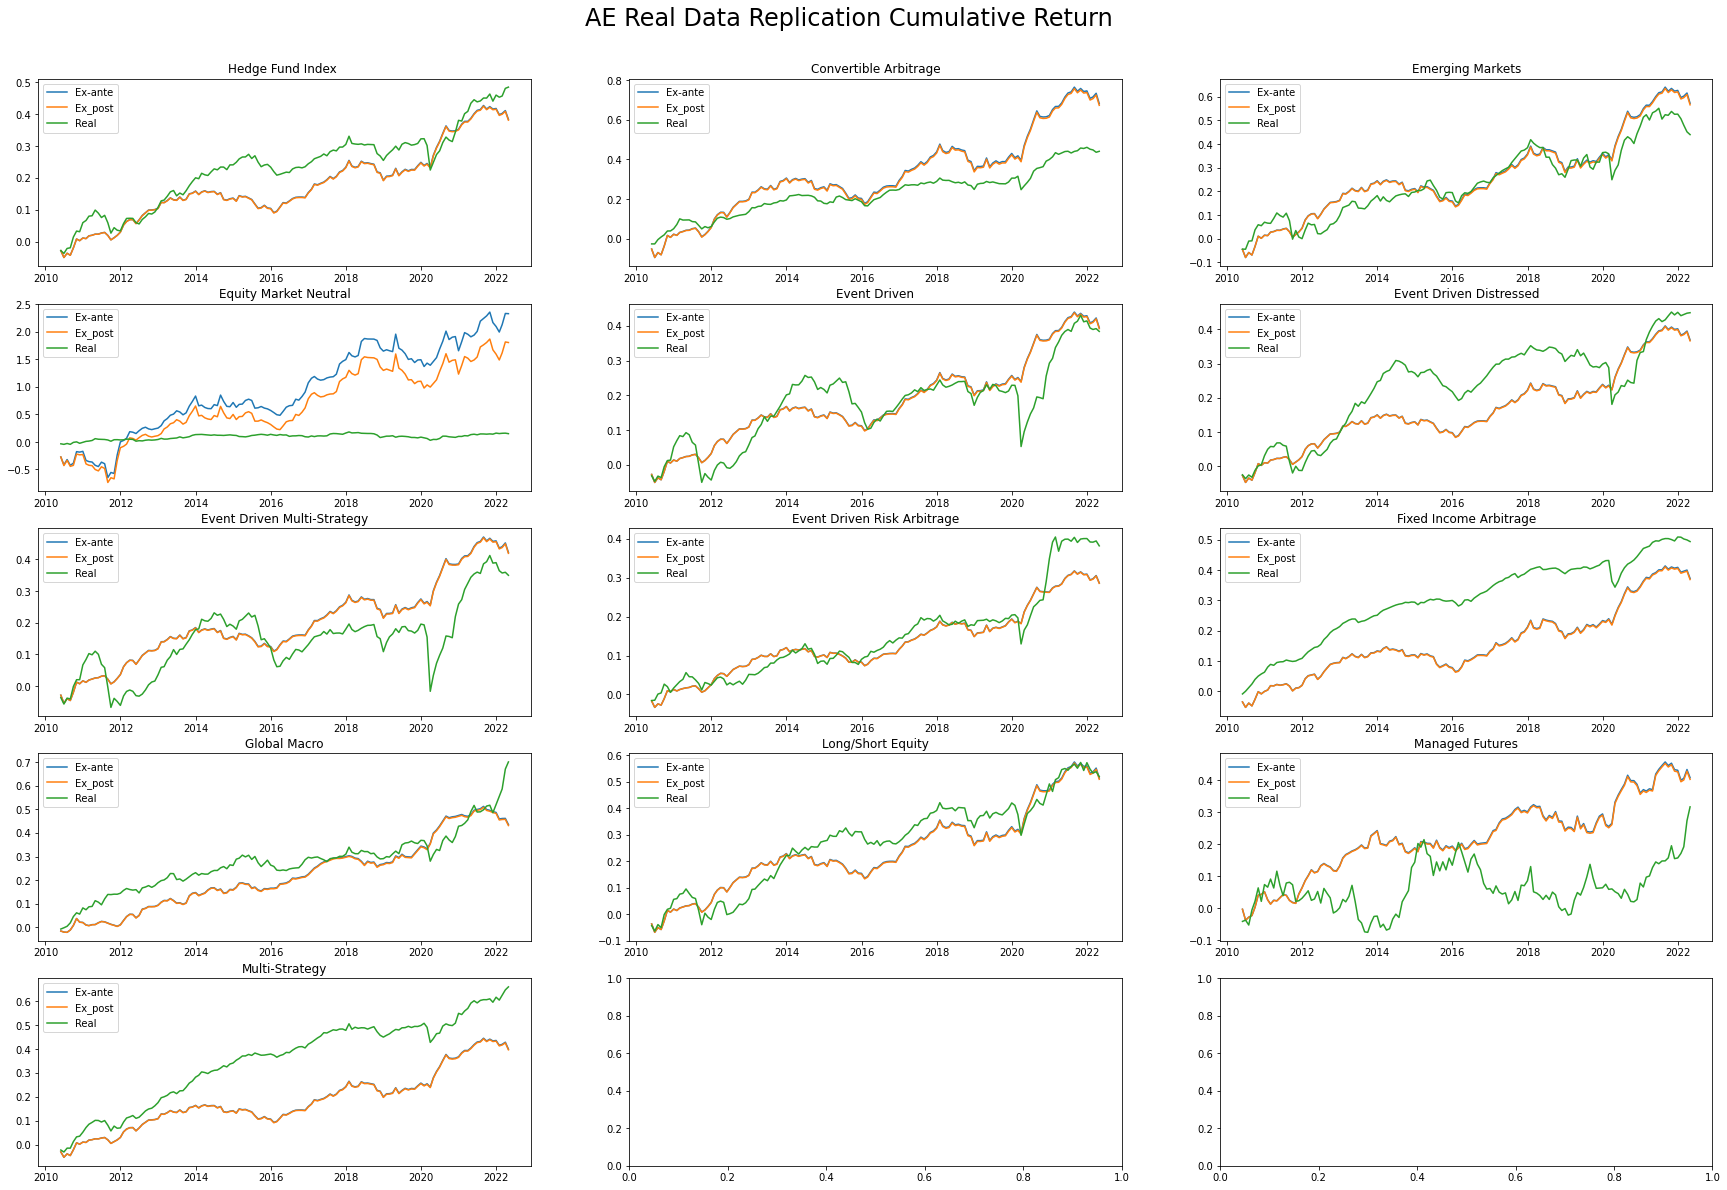

In [624]:
multiplot(best_real_ante,best_real_post,OOS_hfd,title="AE Real Data Replication Cumulative Return")

# Real and generated data

In [670]:
set_seed()

In [671]:
generator = load_model('./GAN/trained_generator/MTTS_GAN_GP20220621_02-49-32.h5')

In [672]:
gen_data = generator.predict(np.random.normal(0, 1, (10, 168, 36)),verbose=0)

In [673]:
gen_data

array([[[0.4942979 , 0.3626302 , 0.7922718 , ..., 0.68443954,
         1.0279946 , 0.43268394],
        [0.30944046, 0.11918902, 0.38495138, ..., 0.22514006,
         0.8035677 , 0.6191736 ],
        [0.47890523, 0.25765207, 0.27766016, ..., 0.18630084,
         0.644784  , 0.6174134 ],
        ...,
        [0.387655  , 0.35164046, 0.65126187, ..., 0.726498  ,
         0.8443613 , 0.19204323],
        [0.53577805, 0.5787107 , 0.5913867 , ..., 0.585587  ,
         0.6022208 , 0.26648992],
        [0.3059422 , 0.31683117, 0.35285643, ..., 0.49640802,
         0.6851441 , 0.3129181 ]],

       [[0.4667197 , 0.5723374 , 0.9101971 , ..., 0.5384457 ,
         0.99860704, 0.69108194],
        [0.41509527, 0.39811248, 0.55735487, ..., 0.6843255 ,
         0.84467655, 0.54189914],
        [0.37637147, 0.49554864, 0.3760966 , ..., 0.40424588,
         0.7803135 , 0.5618826 ],
        ...,
        [0.51941615, 0.4429132 , 0.5027035 , ..., 0.49965715,
         0.55472946, 0.24822275],
        [0.4

In [674]:
# from helper import dic_save
#
# dic_save(gen_data,'./GAN/generated_data2022-07-09.pkl')
# gen_data=dic_read('./GAN/generated_data2022-07-09.pkl')

In [675]:
gen_data.shape

(10, 168, 36)

In [676]:
#reverse scale of the generated data
data_scale = MinMaxScaler()
data_scale.fit(factor_etf_data.join(hfd).join(rf))
ret_gen=[]
for i in range(gen_data.shape[0]):
    ret_gen.append(data_scale.inverse_transform(gen_data[i]))
ret_gen = np.array(ret_gen)

In [677]:
train_factor,train_temp = factor_hf_split(ret_gen,22)
train_hf,train_rf=train_temp[:,:13],train_temp[:,13]

In [678]:
X_train

array([[ 0.01338242, -0.00311489,  0.02324506, ...,  0.04108192,
         0.01743098,  0.01372892],
       [-0.01425352, -0.01821171, -0.05000657, ..., -0.04774433,
        -0.05081702, -0.04958128],
       [ 0.01010709,  0.02363147,  0.00828732, ...,  0.02870503,
         0.01517646,  0.0018789 ],
       ...,
       [ 0.01619079,  0.02297194,  0.03430273, ..., -0.03107914,
        -0.01985971, -0.02902878],
       [-0.00123416,  0.00993263,  0.02274567, ..., -0.0508981 ,
        -0.06302532, -0.05427426],
       [ 0.00380441,  0.00511444,  0.02989865, ...,  0.02559314,
         0.01786302,  0.00726277]])

In [679]:
X_train=np.vstack([train_factor,np.array(X_train)])
Y_train=np.vstack([train_hf,np.array(Y_train)])

In [680]:
obj=[]
IS=[]
OOS=[]
OOS_RMSE=[]
IS_RMSE=[]
for i in range(1,22):
    autoencoder_real = AE(X_train,Y_train,X_test,Y_test,i)
    autoencoder_real.train(verbose=0,plot=False)
    obj.append(autoencoder_real)
    IS.append(autoencoder_real.model_IS_r2())
    IS_RMSE.append(autoencoder_real.model_IS_RMSE())
    OOS.append(autoencoder_real.model_OOS_r2())
    OOS_RMSE.append(autoencoder_real.model_OOS_RMSE())
    print(f"{i}/21")

1/21
2/21
3/21
4/21
5/21
6/21
7/21
8/21
9/21
10/21
11/21
12/21
13/21
14/21
15/21
16/21
17/21
18/21
19/21
20/21
21/21


In [681]:
pd.DataFrame(np.round(IS,3))

,0
0,0.201
1,0.408
2,0.555
3,0.677
4,0.747
5,0.790
6,0.829
7,0.860
8,0.878
9,0.897


In [682]:
pd.DataFrame(np.round(IS_RMSE,3))

,0
0,0.101
1,0.085
2,0.072
3,0.060
4,0.052
5,0.047
6,0.042
7,0.037
8,0.034
9,0.032


Text(0.5, 1.0, 'R2 OOS for Different Latent Dimensions')

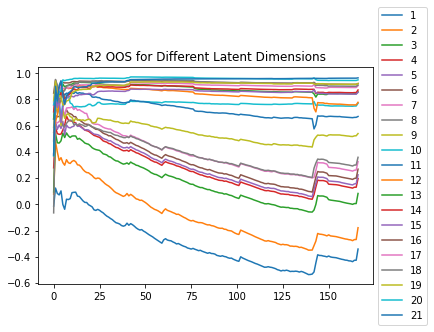

In [683]:
plt.plot(pd.DataFrame(OOS).T)
plt.legend(range(1,22),bbox_to_anchor=(1, 1.3))
plt.title('R2 OOS for Different Latent Dimensions')

Text(0.5, 1.0, 'RMSE OOS for Different Latent Dimensions')

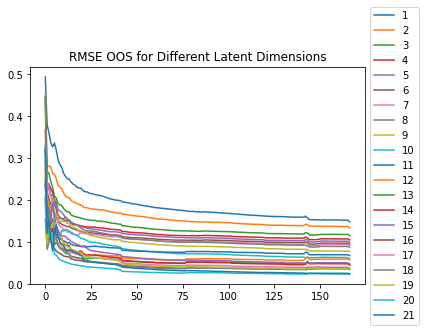

In [684]:
plt.plot(pd.DataFrame(OOS_RMSE).T)
plt.legend(range(1,22),bbox_to_anchor=(1, 1.3))
plt.title('RMSE OOS for Different Latent Dimensions')

In [685]:
OOS_acc = pd.DataFrame(OOS).T
OOS_RMSE = pd.DataFrame(OOS_RMSE).T

In [686]:
np.round(OOS_acc.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
0,167.0,-0.298,0.182,-0.536,-0.430,-0.364,-0.162,0.124
1,167.0,-0.087,0.207,-0.350,-0.254,-0.153,0.065,0.477
2,167.0,0.170,0.176,-0.059,0.023,0.112,0.307,0.544
3,167.0,0.272,0.172,0.038,0.136,0.212,0.406,0.674
4,167.0,0.291,0.165,0.058,0.162,0.233,0.429,0.637
5,167.0,0.331,0.174,0.093,0.200,0.268,0.463,0.720
6,167.0,0.399,0.155,0.201,0.273,0.344,0.517,0.742
7,167.0,0.393,0.137,-0.065,0.298,0.345,0.509,0.782
8,167.0,0.551,0.074,0.437,0.492,0.529,0.619,0.766
9,167.0,0.764,0.035,0.369,0.761,0.765,0.776,0.846


In [687]:
np.round(OOS_RMSE.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
0,167.0,0.189,0.048,0.149,0.161,0.173,0.198,0.493
1,167.0,0.162,0.037,0.133,0.141,0.148,0.168,0.451
2,167.0,0.138,0.035,0.115,0.121,0.127,0.141,0.446
3,167.0,0.124,0.029,0.105,0.110,0.116,0.127,0.367
4,167.0,0.120,0.029,0.100,0.105,0.110,0.122,0.322
5,167.0,0.112,0.025,0.095,0.100,0.105,0.114,0.328
6,167.0,0.109,0.027,0.092,0.096,0.101,0.111,0.326
7,167.0,0.110,0.034,0.088,0.094,0.100,0.112,0.437
8,167.0,0.100,0.027,0.078,0.084,0.090,0.104,0.258
9,167.0,0.083,0.030,0.061,0.066,0.072,0.086,0.334


In [688]:
# obj=[]
ante = []
post=[]
plot=[]
turnover = []
for i,ae_obj in enumerate(obj):
    # autoencoder_real = AE(X_train, Y_train, X_test, Y_test, i)
    # autoencoder_real.train(verbose=0, plot=False)
    ante.append(ae_obj.ante(rf, hfd))
    turnover.append(ae_obj.turnover(hfd_fullname))
    post.append(ae_obj.post(factor_etf_data))
    # obj.append(autoencoder_real)
    print(f'{i+1}/21')

1/21
2/21
3/21
4/21
5/21
6/21
7/21
8/21
9/21
10/21
11/21
12/21
13/21
14/21
15/21
16/21
17/21
18/21
19/21
20/21
21/21


In [689]:
ante_res=[]
post_res=[]
for ex_ante in ante:
    ante_res.append(data_analysis(ex_ante,hfd_fullname.values(),rf=rf[-144:],span=factor_etf_data,real_data=True,start='2010-05-31',end='2022-04-30'))
for ex_post in post:
    post_res.append(data_analysis(ex_post,hfd_fullname.values(),rf=rf[-144:],span=factor_etf_data,real_data=True,start='2010-05-31',end='2022-04-30'))

C:\Users\kevin\AppData\Local\Temp/ipykernel_21608/2212952401.py:76: RuntimeWarning: invalid value encountered in log
  numerator=np.log(average)


In [690]:
hfd_res=data_analysis(hfd[-144:],name=hfd_fullname.values(),rf=rf[-144:],span=factor_etf_data,real_data=True,start='2010-05-31',end='2022-04-30')

In [691]:
best_post_res,strat_best_idx=res_sort(post_res)

In [692]:
np.round(hfd_res,3)

,Skewness,Kurtosis,Omega_ratio(0%),Omega_ratio(10%),cVaR(95%),CEQ Gamma=2,CEQ Gamma=5,CEQ Gamma=10,Annualized_Sharpe,FF3F_alpha,FF5F_alpha,GRS_testF,HK_testF,GRS_test_pval,HK_test_pval
Hedge Fund Index,-1.322,6.283,1.909,0.593,-0.032,0.033,0.029,0.022,0.725,0.001,0.001,7.392,9.357,0.008,0.000
Convertible Arbitrage,-1.140,7.299,2.051,0.512,-0.025,0.030,0.027,0.023,0.764,0.002,0.002,8.236,7.794,0.005,0.001
Emerging Markets,-1.019,3.404,1.418,0.708,-0.056,0.025,0.014,-0.006,0.390,-0.000,-0.000,2.162,1.406,0.144,0.249
Equity Market Neutral,-0.122,0.973,1.218,0.399,-0.031,0.006,0.002,-0.004,0.164,-0.001,-0.001,1.759,9.440,0.187,0.000
Event Driven,-2.484,16.268,1.455,0.614,-0.052,0.022,0.012,-0.008,0.372,-0.001,-0.001,1.452,2.616,0.231,0.077
Event Driven Distressed,-1.967,15.010,1.739,0.585,-0.036,0.029,0.024,0.014,0.578,0.001,0.001,9.067,11.474,0.003,0.000
Event Driven Multi-Strategy,-2.583,16.529,1.346,0.634,-0.062,0.017,0.003,-0.027,0.287,-0.001,-0.001,0.130,0.638,0.719,0.530
Event Driven Risk Arbitrage,-0.199,7.697,1.830,0.458,-0.026,0.025,0.022,0.016,0.593,0.001,0.001,7.380,6.258,0.008,0.003
Fixed Income Arbitrage,-3.704,28.994,3.155,0.369,-0.019,0.035,0.034,0.031,1.184,0.003,0.003,25.903,24.243,0.000,0.000
Global Macro,0.366,4.719,2.317,0.822,-0.030,0.050,0.045,0.037,0.933,0.003,0.003,8.432,9.358,0.004,0.000


In [693]:
pd.DataFrame(hfd_res.columns)

,0
0,Skewness
1,Kurtosis
2,Omega_ratio(0%)
3,Omega_ratio(10%)
4,cVaR(95%)
5,CEQ Gamma=2
6,CEQ Gamma=5
7,CEQ Gamma=10
8,Annualized_Sharpe
9,FF3F_alpha


In [694]:
best_post_ante=[]
for idx,latent in enumerate(strat_best_idx):
    best_post_ante.append(ante_res[latent].iloc[idx])
np.round(pd.DataFrame(best_post_ante,index=best_post_res.index),3)

,Skewness,Kurtosis,Omega_ratio(0%),Omega_ratio(10%),cVaR(95%),CEQ Gamma=2,CEQ Gamma=5,CEQ Gamma=10,Annualized_Sharpe,FF3F_alpha,FF5F_alpha,GRS_testF,HK_testF,GRS_test_pval,HK_test_pval
Hedge Fund Index latent 8,0.279,1.146,2.014,0.778,-0.030,0.045,0.040,0.032,0.836,0.002,0.002,0.056,1.544,0.813,0.218
Convertible Arbitrage latent 8,0.163,0.694,2.029,1.199,-0.057,0.082,0.065,0.038,0.883,0.005,0.005,0.050,8.232,0.824,0.000
Emerging Markets latent 8,0.238,0.603,1.961,1.119,-0.048,0.073,0.060,0.037,0.859,0.003,0.003,0.429,3.234,0.514,0.043
Equity Market Neutral latent 4,0.618,2.447,1.619,1.184,-0.093,0.075,0.028,-0.049,0.589,0.005,0.005,0.486,0.264,0.487,0.768
Event Driven latent 8,0.218,1.296,2.082,0.793,-0.033,0.047,0.041,0.033,0.847,0.002,0.002,0.001,2.726,0.970,0.070
Event Driven Distressed latent 8,0.153,1.091,1.963,0.828,-0.037,0.047,0.041,0.030,0.788,0.002,0.002,0.000,2.704,0.994,0.071
Event Driven Multi-Strategy latent 8,0.260,1.439,2.161,0.756,-0.030,0.045,0.041,0.033,0.882,0.002,0.002,0.003,2.590,0.954,0.079
Event Driven Risk Arbitrage latent 8,0.269,1.164,2.379,0.400,-0.016,0.028,0.027,0.025,0.953,0.002,0.002,0.953,3.884,0.331,0.023
Fixed Income Arbitrage latent 8,-0.272,0.816,1.815,0.800,-0.042,0.044,0.037,0.025,0.723,0.002,0.002,0.027,3.642,0.870,0.029
Global Macro latent 8,0.259,0.939,1.878,0.631,-0.025,0.035,0.031,0.025,0.754,0.002,0.002,0.003,0.155,0.959,0.857


In [695]:
np.round(best_post_res,3)

,Skewness,Kurtosis,Omega_ratio(0%),Omega_ratio(10%),cVaR(95%),CEQ Gamma=2,CEQ Gamma=5,CEQ Gamma=10,Annualized_Sharpe,FF3F_alpha,FF5F_alpha,GRS_testF,HK_testF,GRS_test_pval,HK_test_pval
Hedge Fund Index latent 8,0.281,1.141,1.985,0.767,-0.031,0.044,0.039,0.031,0.818,0.002,0.002,0.013,1.480,0.910,0.232
Convertible Arbitrage latent 8,0.167,0.690,1.954,1.156,-0.057,0.077,0.060,0.033,0.835,0.005,0.005,0.203,8.135,0.653,0.000
Emerging Markets latent 8,0.241,0.595,1.904,1.088,-0.049,0.069,0.056,0.033,0.820,0.003,0.003,0.131,2.914,0.718,0.058
Equity Market Neutral latent 4,0.614,2.450,1.548,1.133,-0.094,0.064,0.017,-0.060,0.532,0.004,0.004,0.147,0.086,0.702,0.918
Event Driven latent 8,0.221,1.293,2.048,0.781,-0.033,0.045,0.040,0.031,0.826,0.002,0.002,0.007,2.677,0.935,0.073
Event Driven Distressed latent 8,0.156,1.087,1.930,0.814,-0.037,0.046,0.039,0.029,0.766,0.002,0.002,0.015,2.653,0.902,0.075
Event Driven Multi-Strategy latent 8,0.263,1.436,2.127,0.745,-0.030,0.044,0.040,0.032,0.862,0.002,0.002,0.003,2.546,0.959,0.083
Event Driven Risk Arbitrage latent 8,0.270,1.161,2.353,0.397,-0.016,0.028,0.027,0.024,0.940,0.002,0.002,0.789,3.861,0.376,0.024
Fixed Income Arbitrage latent 8,-0.270,0.812,1.780,0.784,-0.042,0.042,0.035,0.024,0.697,0.002,0.002,0.092,3.598,0.762,0.030
Global Macro latent 8,0.258,0.936,1.849,0.622,-0.025,0.034,0.030,0.024,0.734,0.002,0.002,0.006,0.143,0.940,0.867


In [704]:
np.round(turnover[9],3)#note the value should *12/14 to get what we reported in the paper

,Turnover
Real_AE,
Hedge Fund Index,5.986
Convertible Arbitrage,11.163
Emerging Markets,7.813
Equity Market Neutral,69.537
Event Driven,5.370
Event Driven Distressed,7.170
Event Driven Multi-Strategy,4.399
Event Driven Risk Arbitrage,2.969
Fixed Income Arbitrage,9.851


In [705]:
best_generated_ante=[]
best_generated_post=[]
for strat_idx,latent_idx in enumerate(strat_best_idx):
    best_generated_ante.append(ante[latent_idx].iloc[:,strat_idx])
    best_generated_post.append(post[latent_idx].iloc[:,strat_idx])
    # print((strat_idx,latent_idx))
best_generated_ante=pd.DataFrame(best_generated_ante).T
best_generated_post=pd.DataFrame(best_generated_post).T

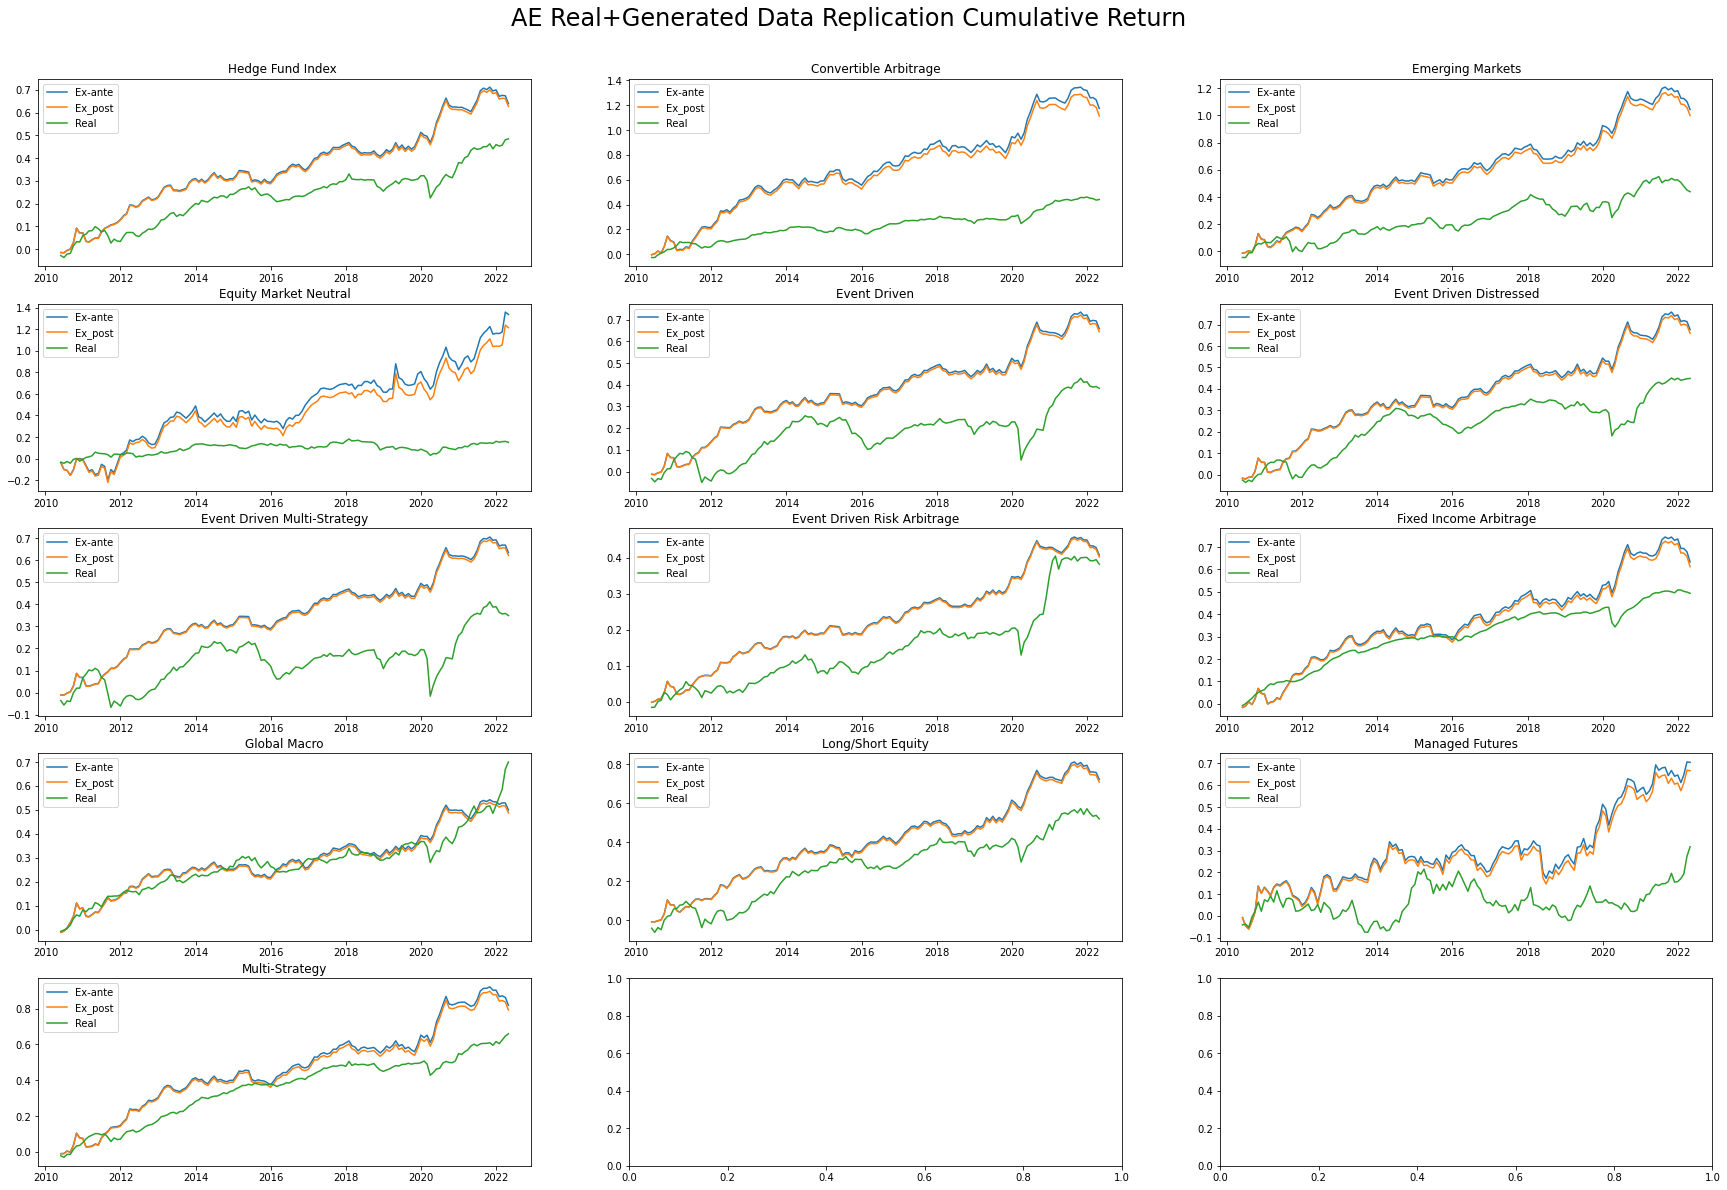

In [709]:
multiplot(best_generated_ante,best_generated_post,OOS_hfd,title="AE Real+Generated Data Replication Cumulative Return")